In [25]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

URL = 'C:\\Users\\User\\Desktop\\강의 자료\\2020 2학기\\객체지향언어와실습\\TeamProject\\datasets_TRAIN.csv'
dataframe1 = pd.read_csv(URL)
dataframe1.head()

,DATE,TEAM,WIN,WINRATE,AVG,SLG,RBI/AB,R/AB,SB,LP/AB,AVGP,SLGP,K/AB,BB/AB,Err/AB
0,19670410,NYA,1,1.0,0.513,0.154,0.205,0.205,0.0,0.000,0.067,0.000,0.200,0.100,0.026
1,19670410,WS2,0,0.0,0.067,0.000,0.000,0.000,0.0,0.205,0.513,0.154,0.154,0.077,0.067
2,19670410,LAN,0,0.0,0.219,0.031,0.031,0.031,0.0,0.194,0.452,0.129,0.065,0.129,0.000
3,19670410,CIN,1,1.0,0.452,0.129,0.194,0.194,1.0,0.031,0.219,0.031,0.156,0.062,0.000
4,19670411,MIN,0,0.0,0.353,0.088,0.088,0.088,0.0,0.200,0.367,0.133,0.167,0.100,0.059


In [26]:
testdata = 'C:\\Users\\User\\Desktop\\강의 자료\\2020 2학기\\객체지향언어와실습\\TeamProject\\datasets_EVAL.csv'
dataframe2=pd.read_csv(testdata)
dataframe2.head()



,DATE,TEAM,WIN,WINRATE,AVG,SLG,RBI/AB,R/AB,SB,LP/AB,AVGP,SLGP,K/AB,BB/AB,Err/AB
0,19670411,CLE,0,0.0,0.212,0.061,0.091,0.091,0.000,0.129,0.323,0.000,0.290,0.290,0.030
1,19670411,KC1,1,1.0,0.323,0.000,0.097,0.129,0.500,0.091,0.212,0.061,0.182,0.091,0.065
2,19670412,CHA,0,0.0,0.250,0.031,0.031,0.125,0.667,0.167,0.300,0.067,0.133,0.267,0.031
3,19670412,BOS,1,1.0,0.300,0.067,0.133,0.167,1.000,0.125,0.250,0.031,0.219,0.125,0.033
4,19670412,PHI,1,1.0,0.244,0.049,0.098,0.122,0.000,0.100,0.350,0.075,0.025,0.125,0.073


In [36]:
train, val = train_test_split(dataframe1, test_size=0.2)
#test=dataframe3
trash, test = train_test_split(dataframe2,test_size=0.8)
print(len(train), '훈련 샘플')
print(len(val), '검증 샘플')
print(len(test), '테스트 샘플')
print(len(trash), '예측 샘플')

def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('WIN')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

batch_size = 1024
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)
trash_ds = df_to_dataset(trash,shuffle=False,batch_size=batch_size)
for feature_batch, label_batch in train_ds.take(1):
  print('전체 특성:', list(feature_batch.keys()))
  print('타율 특성의 배치:', feature_batch['AVG'])
  print('타깃의 배치:', label_batch )

feature_columns = []
for header in ['WINRATE', 'AVG', 'SLG','R/AB','SB','LP/AB','AVGP','SLGP','RBI/AB','K/AB','BB/AB','Err/AB']: #
  feature_columns.append(feature_column.numeric_column(header))
batch_size = 1024
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

106921 훈련 샘플
26731 검증 샘플
31615 테스트 샘플
7903 예측 샘플
전체 특성: ['DATE', 'TEAM', 'WINRATE', 'AVG', 'SLG', 'RBI/AB', 'R/AB', 'SB', 'LP/AB', 'AVGP', 'SLGP', 'K/AB', 'BB/AB', 'Err/AB']
타율 특성의 배치: tf.Tensor([0.343 0.258 0.515 ... 0.375 0.459 0.226], shape=(1024,), dtype=float64)
타깃의 배치: tf.Tensor([1 0 1 ... 0 1 0], shape=(1024,), dtype=int64)


In [37]:
model1= tf.keras.Sequential([
  feature_layer,
  layers.BatchNormalization(),
  layers.Dense(100,activation='relu'),
  layers.Dense(100, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
DNN1=model1.fit(train_ds,
          validation_data=val_ds,
          epochs=30)

Epoch 1/30
Consider rewriting this model with the Functional API.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Consider rewriting this model with the Functional API.
105/105 [==============================] - ETA: 0s - loss: 0.1633 - accuracy: 0.9563WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'DATE': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=int64>, 'TEAM': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=string>, 'WINRATE': <tf.Tensor 'ExpandDims_13:0' s

105/105 [==============================] - 1s 12ms/step - loss: 0.0031 - accuracy: 0.9988 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 29/30
105/105 [==============================] - 1s 12ms/step - loss: 0.0033 - accuracy: 0.9987 - val_loss: 0.0044 - val_accuracy: 0.9987
Epoch 30/30
105/105 [==============================] - 1s 12ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0044 - val_accuracy: 0.9987


In [39]:
model1.summary()
loss1, accuracy1 = model1.evaluate(test_ds)
print("1 정확도", round(accuracy1,3))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features_3 (DenseFeatu multiple                  0         
_________________________________________________________________
batch_normalization_3 (Batch multiple                  48        
_________________________________________________________________
dense_9 (Dense)              multiple                  1300      
_________________________________________________________________
dense_10 (Dense)             multiple                  10100     
_________________________________________________________________
dense_11 (Dense)             multiple                  101       
Total params: 11,549
Trainable params: 11,525
Non-trainable params: 24
_________________________________________________________________
31/31 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 0.9966
1 정확도 0.997


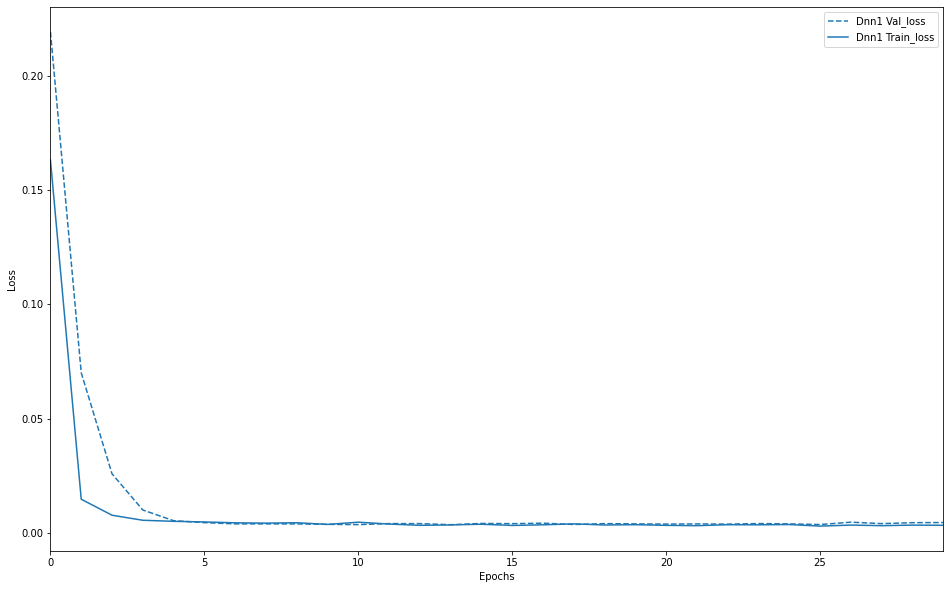

In [40]:
def plot_history(histories, key='loss'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val_loss')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train_loss')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('DNN1', DNN1)])

In [42]:
predict=model1.predict(trash_ds)
result=[]
for i in range(len(predict)):
    result.append(int(predict[i]))
    print(result[i])
    
print(len(result))

0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
